In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline


In [70]:
# Generating random data
# Single independent variable
X = 6 * np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)
# np.random.randn(200,1) is random noise

# y = 0.8x^2 + 0.9x + 2 

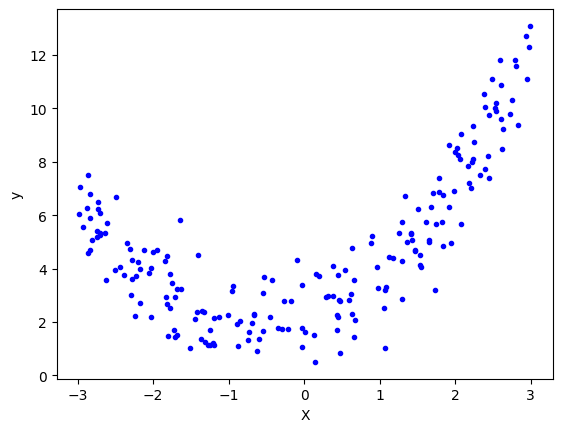

In [71]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [73]:
# Applying Linear Regression
lr = LinearRegression()

In [74]:
lr.fit(X_train,y_train)

LinearRegression()

In [75]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.3236036512513851

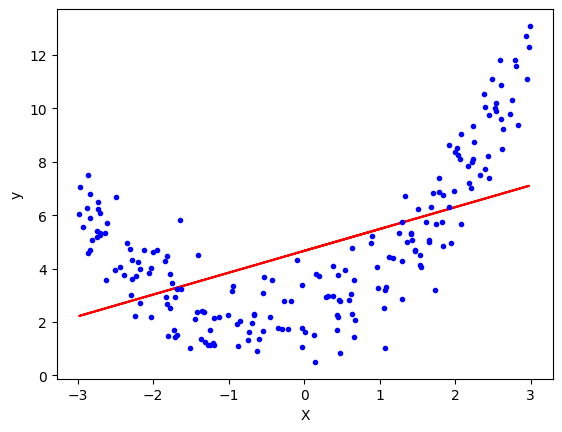

In [76]:
plt.plot(X_train,lr.predict(X_train),color='r')
# plt.plot(X_test,lr.predict(X_test),color='g')
plt.plot(X,y,".b")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Linear Regression doesn't fit non linear data...here comes Polynomial Regression

In [77]:
# Applying Polynomial Regression
poly = PolynomialFeatures(degree=2,include_bias=True)
# poly = PolynomialFeatures(degree=2,include_bias=False)
# include_bias=False will remove X^0 col
# degree 2 means if there is one independent var(one col) X it will be transformed to
# three cols- X^0 i.e 1, X^1 i.e X, X^2 
# we only transform input variables i.e X and not y

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
# X_test_trans = poly.fit_transform(X_test)   ??????
# fit(), transform(), fit_transform()

In [78]:
print(X_train[0])
print(X_train_trans[0])

[1.0684115]
[1.         1.0684115  1.14150314]


In [79]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [80]:
y_pred = lr.predict(X_test_trans)

In [81]:
r2_score(y_test,y_pred)

0.9158982574103318

In [82]:
print(lr.coef_)
print(lr.intercept_)
# compare with this equation: y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)
# X^0, X^1, X^2

[[0.         0.92412303 0.76141129]]
[2.18886131]


In [83]:
# X_test_trans.reshape(120,1)

In [84]:
X_new = np.linspace(-3, 3, 200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

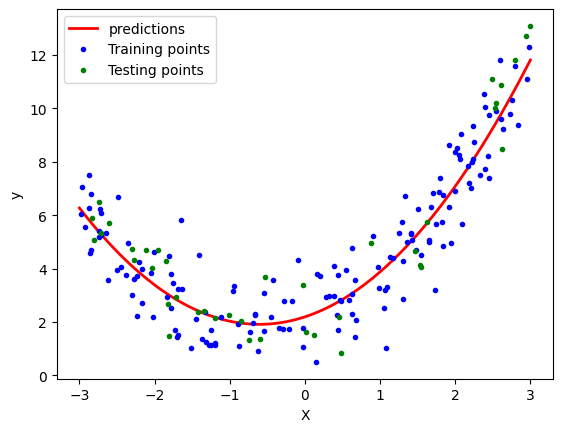

In [85]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="predictions")
# plt.plot(X_test_trans, y_pred, "r-", linewidth=2, label="predictions")

plt.plot(X_train, y_train, "b.", label="Training points")
plt.plot(X_test, y_test, "g.", label="Testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [86]:
# StandardScaler operates on the principle of normalization, where it transforms the 
# distribution of each feature to have a mean of zero
# and a standard deviation of one. This process ensures that all features are on 
# the same scale, preventing any single feature from dominating the learning process
# due to its larger magnitude.
# StandardScaler does not alter the shape of the distribution of each feature; it only shifts
# and scales it. As a result, the relative relationships between feature values are preserved
# making it suitable for datasets with non-Gaussian distributions.

In [87]:
# Simple Polynomial Regression- only 1 independent variable

def polynomial_regression(degree):
    
    X_new = np.linspace(-3,3,100).reshape(100,1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
               ("poly_features",polybig_features),
               ("std_scaler",std_scaler),
               ("lin_reg",lin_reg),
    ])
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r',label='Degree'+str(degree), linewidth=2)
    
    plt.plot(X_train,y_train,"b.",linewidth=3)
    plt.plot(X_test,y_test,"g.",linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.axis([-3,3,0,10])
    plt.show()

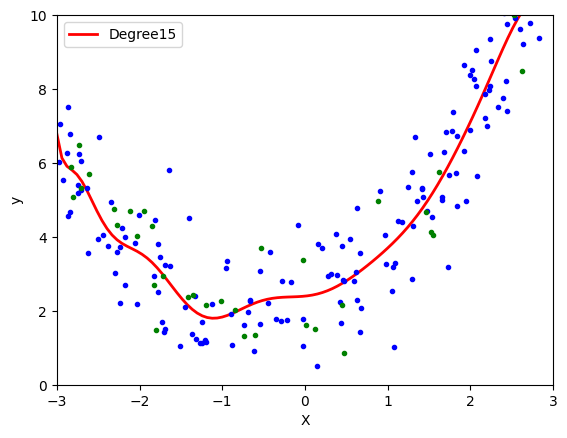

In [88]:
polynomial_regression(15)

In [90]:
# 3D Polynomial Regression - multiple independent variables
x = 7 * np.random.rand(100,1) - 2.8
y = 7 * np.random.rand(100,1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100,1)

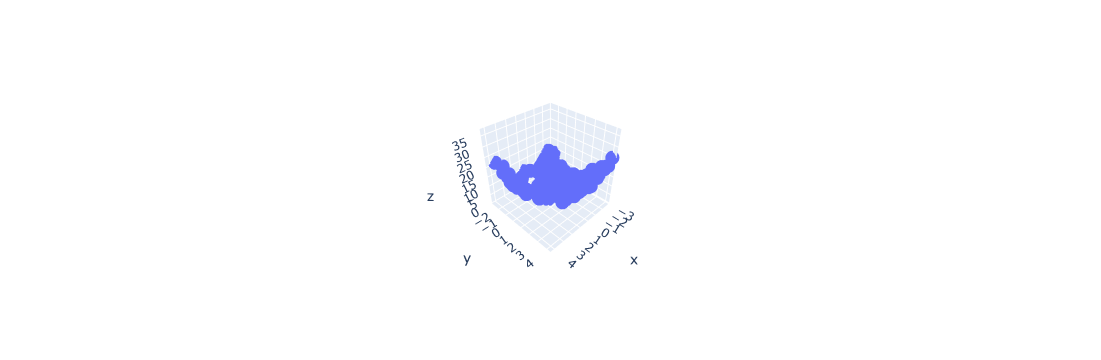

In [91]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [92]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input, y_input)

final = np.vstack((xGrid.ravel().reshape(1,100), yGrid.ravel().reshape(1,100))).T
z_final = lr.predict(final).reshape(10,10)


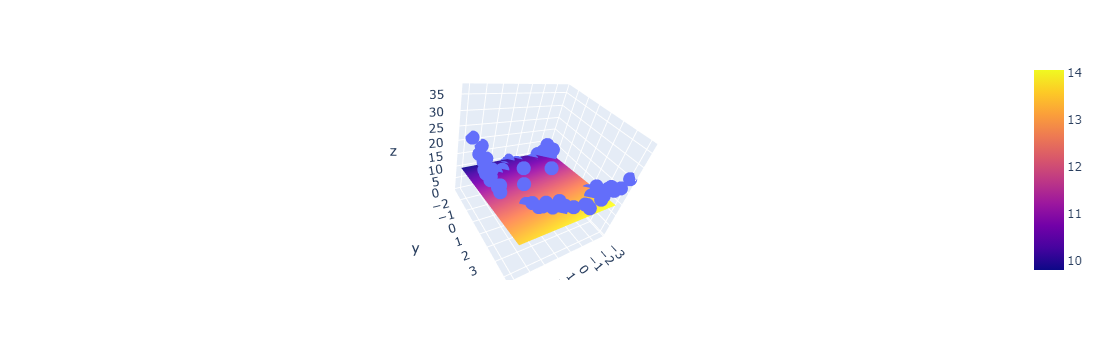

In [93]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))

fig.show()

In [101]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [114]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [116]:
print("Input",poly.n_input_features_)
print("Output",poly.n_output_features_)
print("Powers\n",poly.powers_) 

AttributeError: 'PolynomialFeatures' object has no attribute 'n_input_features_'

In [107]:
X_multi_trans.shape

(100, 6)

In [108]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [110]:
X_test_multi = poly.transform(final)

In [111]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

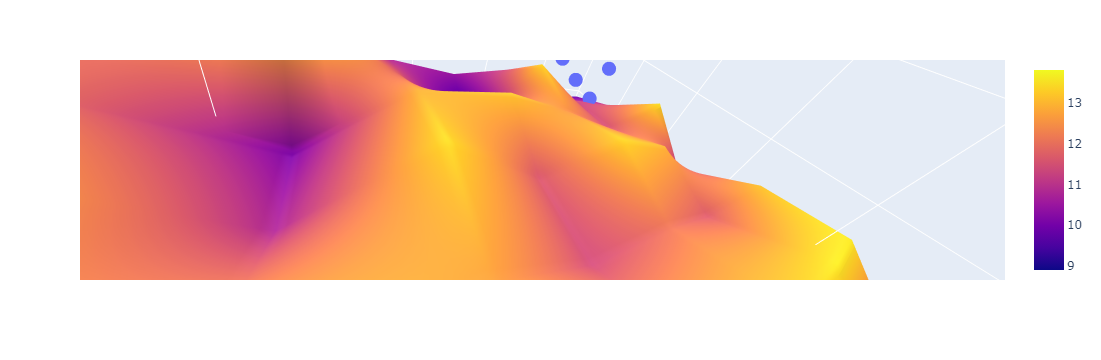

In [112]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))
fig.update_layout(scene=dict(zaxis=dict(range=[0,35])))
fig.show()